In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [4]:
data_train = pd.read_csv('./train.csv',nrows=10000)
data_test_a = pd.read_csv('./testA.csv')

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
id                    10000 non-null int64
loanAmnt              10000 non-null float64
term                  10000 non-null int64
interestRate          10000 non-null float64
installment           10000 non-null float64
grade                 10000 non-null object
subGrade              10000 non-null object
employmentTitle       10000 non-null float64
employmentLength      9452 non-null object
homeOwnership         10000 non-null int64
annualIncome          10000 non-null float64
verificationStatus    10000 non-null int64
issueDate             10000 non-null object
isDefault             10000 non-null int64
purpose               10000 non-null int64
postCode              10000 non-null float64
regionCode            10000 non-null int64
dti                   9999 non-null float64
delinquency_2years    10000 non-null float64
ficoRangeLow          10000 non-null float64
ficoRangeHig

In [6]:
data_test_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 46 columns):
id                    200000 non-null int64
loanAmnt              200000 non-null float64
term                  200000 non-null int64
interestRate          200000 non-null float64
installment           200000 non-null float64
grade                 200000 non-null object
subGrade              200000 non-null object
employmentTitle       200000 non-null float64
employmentLength      188258 non-null object
homeOwnership         200000 non-null int64
annualIncome          200000 non-null float64
verificationStatus    200000 non-null int64
issueDate             200000 non-null object
purpose               200000 non-null int64
postCode              200000 non-null float64
regionCode            200000 non-null int64
dti                   199939 non-null float64
delinquency_2years    200000 non-null float64
ficoRangeLow          200000 non-null float64
ficoRangeHigh         200000 no

In [7]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,...,9508.000000,9508.000000,9508.000000,9508.000000,9508.000000,9599.000000,9128.000000,9508.000000,9508.000000,9508.000000
mean,4999.50000,14388.817500,3.488400,13.273514,436.921676,72231.67300,0.622400,75495.471037,1.00630,0.198400,...,8.090976,8.744321,8.349811,14.703513,5.635780,11.763100,0.001424,0.004417,0.100126,2.220446
std,2886.89568,8717.846163,0.859267,4.735710,261.286917,106785.82116,0.681663,50354.317248,0.77648,0.398815,...,4.805246,7.565217,4.680387,8.207645,3.256628,5.665461,0.040515,0.069419,0.584923,1.844369
min,0.00000,1000.000000,3.000000,5.310000,30.120000,1.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,8000.000000,3.000000,9.750000,248.517500,427.00000,0.000000,45000.000000,0.00000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,4999.50000,12000.000000,3.000000,12.790000,373.090000,7701.50000,1.000000,65000.000000,1.00000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,7499.25000,20000.000000,3.000000,16.020000,573.830000,119448.00000,1.000000,90000.000000,2.00000,0.000000,...,11.000000,12.000000,11.000000,19.000000,7.000000,15.000000,0.000000,0.000000,0.000000,3.000000
max,9999.00000,40000.000000,5.000000,30.990000,1486.550000,378327.00000,5.000000,990000.000000,2.00000,1.000000,...,53.000000,67.000000,48.000000,81.000000,30.000000,56.000000,2.000000,2.000000,18.000000,16.000000


In [8]:
pd.set_option('display.max_columns', None)
data_train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,issueDate,isDefault,purpose,postCode,regionCode,dti,delinquency_2years,ficoRangeLow,ficoRangeHigh,openAcc,pubRec,pubRecBankruptcies,revolBal,revolUtil,totalAcc,initialListStatus,applicationType,earliesCreditLine,title,policyCode,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,110000.0,2,2014-07-01,1,1,137.0,32,17.05,0.0,730.0,734.0,7.0,0.0,0.0,24178.0,48.9,27.0,0,0,Aug-2001,1.0,1.0,0.0,2.0,2.0,2.0,4.0,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,46000.0,2,2012-08-01,0,0,156.0,18,27.83,0.0,700.0,704.0,13.0,0.0,0.0,15096.0,38.9,18.0,1,0,May-2002,1723.0,1.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,74000.0,2,2015-10-01,0,0,337.0,14,22.77,0.0,675.0,679.0,11.0,0.0,0.0,4606.0,51.8,27.0,0,0,May-2006,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,118000.0,1,2015-08-01,0,4,148.0,11,17.21,0.0,685.0,689.0,9.0,0.0,0.0,9948.0,52.6,28.0,1,0,May-1999,4.0,1.0,6.0,4.0,6.0,6.0,4.0,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,29000.0,2,2016-03-01,0,10,301.0,21,32.16,0.0,690.0,694.0,12.0,0.0,0.0,2942.0,32.0,27.0,0,0,Aug-1977,11.0,1.0,1.0,2.0,7.0,7.0,2.0,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


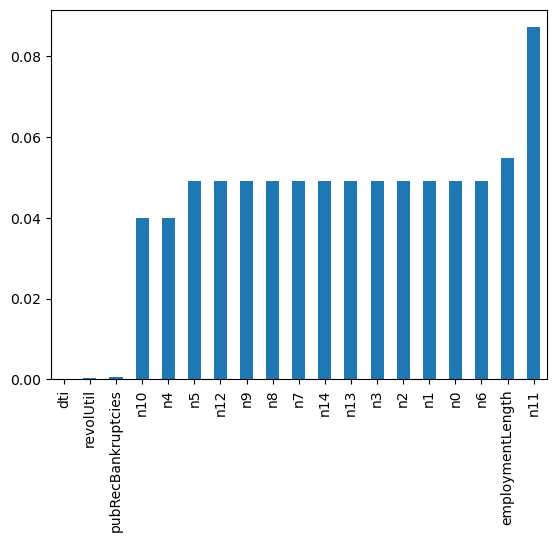

In [9]:
# nan可视化，查看具有缺失值的属性
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [10]:
## 查看属性的特征，是类别型数值还是数值型
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))

In [11]:
## 数值型（数值型特征本是可以直接入模的）
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [ ]:
## 类别型变量
category_fea

In [20]:
## 对数值型特征进行分析，找出其中离散型数据和连续型数据
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

In [21]:
##连续性变量
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [22]:
##离散型变量
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [23]:
##对离散型变量进行查看
data_train['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

In [24]:
data_train['homeOwnership'].value_counts()#离散型变量

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [25]:
data_train['verificationStatus'].value_counts()#离散型变量

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [26]:
data_train['initialListStatus'].value_counts()#离散型变量

0    466438
1    333562
Name: initialListStatus, dtype: int64

In [27]:
data_train['applicationType'].value_counts()#离散型变量

0    784586
1     15414
Name: applicationType, dtype: int64

In [28]:
data_train['policyCode'].value_counts()#离散型变量，全部一个值，对结果无影响，可以删除

1.0    800000
Name: policyCode, dtype: int64

In [29]:
data_train['n11'].value_counts()#离散型变量，相差悬殊，可以删除

0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

In [30]:
data_train['n12'].value_counts()#离散型变量，相差悬殊，可以删除

0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64

In [12]:
data_train['subGrade'].value_counts()

B5    638
C1    624
B4    613
B3    602
C2    569
C4    568
C3    539
B2    535
B1    497
C5    490
A5    486
D1    385
A4    363
D2    346
A2    310
D3    308
D4    296
A1    292
A3    291
D5    235
E2    186
E1    177
E3    135
E4    120
E5    106
F1     66
F2     57
F3     42
F4     32
G1     30
F5     23
G3     13
G4     11
G2      9
G5      6
Name: subGrade, dtype: int64